## Title: WiFi Locationing

Summarize project: investigate the feasibility of using "wifi fingerprinting" to determine a person's location in indoor spaces

## Import Libraries

In [1]:
import pandas as pd

## Import Dataset to Dataframe

In [2]:
df = pd.read_csv('trainingData.csv', header = 0)
df.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [3]:
df.info() #check data types of each variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 529 entries, WAP001 to TIMESTAMP
dtypes: float64(2), int64(527)
memory usage: 80.5 MB


In [4]:
df.describe()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,19937.000000,19937.000000,19937.0,19937.0,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,...,19937.0,19937.000000,1.993700e+04,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,1.993700e+04
mean,99.823644,99.820936,100.0,100.0,99.613733,97.130461,94.733661,93.820234,94.693936,99.163766,...,100.0,-7464.275947,4.864871e+06,1.674575,1.212820,148.429954,1.833024,9.068014,13.021869,1.371421e+09
std,5.866842,5.798156,0.0,0.0,8.615657,22.931890,30.541335,33.010404,30.305084,12.634045,...,0.0,123.402010,6.693318e+01,1.223078,0.833139,58.342106,0.372964,4.988720,5.362410,5.572054e+05
min,-97.000000,-90.000000,100.0,100.0,-97.000000,-98.000000,-99.000000,-98.000000,-98.000000,-99.000000,...,100.0,-7691.338400,4.864746e+06,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.369909e+09
25%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7594.737000,4.864821e+06,1.000000,0.000000,110.000000,2.000000,5.000000,8.000000,1.371056e+09
50%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7423.060900,4.864852e+06,2.000000,1.000000,129.000000,2.000000,11.000000,13.000000,1.371716e+09
75%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7359.193000,4.864930e+06,3.000000,2.000000,207.000000,2.000000,13.000000,14.000000,1.371721e+09
max,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7300.818990,4.865017e+06,4.000000,2.000000,254.000000,2.000000,18.000000,24.000000,1.371738e+09


## Prepare Data for Processing

In [5]:
# check for missing data
df.count() #result is same for each variable, so no missing data - e.g. "na" or "nulls"

WAP001              19937
WAP002              19937
WAP003              19937
WAP004              19937
WAP005              19937
                    ...  
SPACEID             19937
RELATIVEPOSITION    19937
USERID              19937
PHONEID             19937
TIMESTAMP           19937
Length: 529, dtype: int64

In [6]:
df.isnull().sum()

WAP001              0
WAP002              0
WAP003              0
WAP004              0
WAP005              0
                   ..
SPACEID             0
RELATIVEPOSITION    0
USERID              0
PHONEID             0
TIMESTAMP           0
Length: 529, dtype: int64

In [7]:
df.isnull().values.any() #False result means no null values

False

In [8]:
df.isna().values.any() #False result means no na values

False

In [9]:
df.isnull().sum().sum() #0 result means no null or NaN values

0

In [10]:
df.isna().sum().sum() #0 result means no na values

0

In [11]:
#remove the LONGITUDE, LATITUDE, USERID, PHONEID, and TIMESTAMP features/columns since not needed for analysis
df = df.drop(['LONGITUDE'], axis=1)
df = df.drop(['LATITUDE'], axis=1)
df = df.drop(['USERID'], axis=1)
df = df.drop(['PHONEID'], axis=1)
df = df.drop(['TIMESTAMP'], axis=1)
df.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,2,1,106,2
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,2,1,106,2
2,100,100,100,100,100,100,100,-97,100,100,...,100,100,100,100,100,100,2,1,103,2
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,2,1,102,2
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,0,0,122,2


In [12]:
#save dataframe to new csv file
df.to_csv('new_trainingData.csv', index=False)

## Exploratory Data Analysis

In [2]:
import numpy as np
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# count number of records per building
df.groupby('BUILDINGID')['BUILDINGID'].count()

BUILDINGID
0    5249
1    5196
2    9492
Name: BUILDINGID, dtype: int64

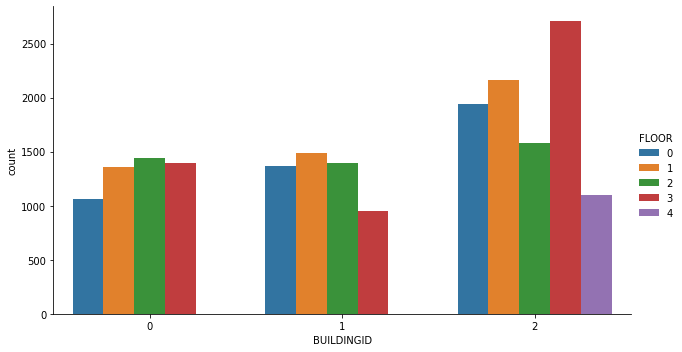

In [15]:
# use seaborn to group by BUILDINGID and FLOOR
g = sns.catplot('BUILDINGID', data=df, hue='FLOOR', kind='count', aspect=1.75)
g.set_xlabels('BUILDINGID')

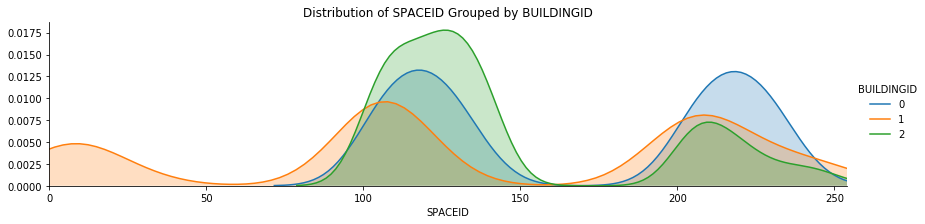

In [16]:
# kde plot Distribution of SPACEID Grouped by BUILDINGID
fig = sns.FacetGrid(df, hue='BUILDINGID', aspect=4)
fig.map(sns.kdeplot, 'SPACEID', shade=True)
oldest = df['SPACEID'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of SPACEID Grouped by BUILDINGID')
fig.add_legend()

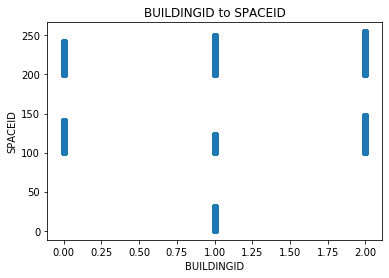

In [17]:
# Scatterplot
x = df['BUILDINGID']
y = df['SPACEID']
plt.title("BUILDINGID to SPACEID")
plt.xlabel("BUILDINGID")
plt.ylabel("SPACEID")
plt.scatter(x,y)
plt.show()

In [18]:
# count number of records per RELATIVEPOSITION
df.groupby('RELATIVEPOSITION')['RELATIVEPOSITION'].count()

RELATIVEPOSITION
1     3329
2    16608
Name: RELATIVEPOSITION, dtype: int64

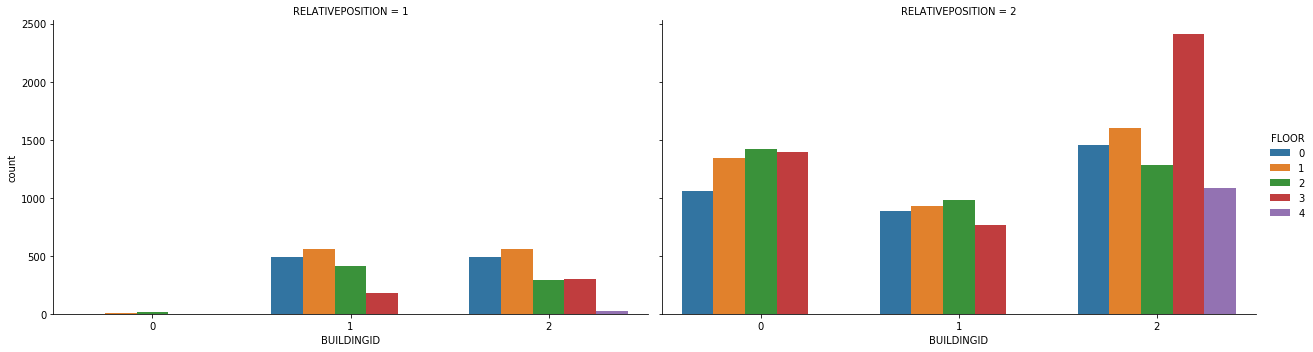

In [19]:
# use seaborn to group by BUILDINGID and RELATIVEPOSITION and FLOOR
g = sns.catplot('BUILDINGID', data=df, hue='FLOOR', col='RELATIVEPOSITION', kind='count', aspect=1.75)
g.set_xlabels('BUILDINGID')

Given this distribution and the problem at hand (navigate the building to interested office), should run models with and without RELATIVEPOSITION=1 records and compare performance. W/O these records should simplify models which may result in better performance.

In [20]:
df.sum(axis = 0, skipna = True)

WAP001              1990184
WAP002              1990130
WAP003              1993700
WAP004              1993700
WAP005              1985999
                     ...   
WAP520              1993700
FLOOR                 33386
BUILDINGID            24180
SPACEID             2959248
RELATIVEPOSITION      36545
Length: 524, dtype: int64

Some WAPs have only "100" in all values which likely provides no meaningful location information to the algorithms. (e.g. column sum = 19937 rows * 100 = 1993700)

In [21]:
df.columns

Index(['WAP001', 'WAP002', 'WAP003', 'WAP004', 'WAP005', 'WAP006', 'WAP007',
       'WAP008', 'WAP009', 'WAP010',
       ...
       'WAP515', 'WAP516', 'WAP517', 'WAP518', 'WAP519', 'WAP520', 'FLOOR',
       'BUILDINGID', 'SPACEID', 'RELATIVEPOSITION'],
      dtype='object', length=524)

In [22]:
df['WAP001'].sum()

1990184

In [23]:
# copy the df to create df with removed WAPs and removed RELATIVEPOSITION=1 records
full_df = df.copy()

# Feature Selection / Feature Engineering

In [24]:
df.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,2,1,106,2
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,2,1,106,2
2,100,100,100,100,100,100,100,-97,100,100,...,100,100,100,100,100,100,2,1,103,2
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,2,1,102,2
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,0,0,122,2


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 524 entries, WAP001 to RELATIVEPOSITION
dtypes: int64(524)
memory usage: 79.7 MB


In [26]:
#copied code from https://www.geeksforgeeks.org/how-to-drop-one-or-multiple-columns-in-pandas-dataframe/
# Convert the dictionary into DataFrame  
#df = pd.DataFrame(data) 
#for col in df.columns: 
#    if 'A' in col: 
#        del df[col] 

# remove all WAP columns that sum to 1993700 (contain only "100" values)
for col in df.columns:
    if df[col].sum() == 1993700: 
        del df[col]


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 469 entries, WAP001 to RELATIVEPOSITION
dtypes: int64(469)
memory usage: 71.3 MB


In [28]:
df.head()

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,2,1,106,2
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,2,1,106,2
2,100,100,100,100,100,-97,100,100,100,100,...,100,100,100,100,100,100,2,1,103,2
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,2,1,102,2
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,0,0,122,2


Removed 524-469=55 columns of WAP data

In [29]:
#remove all rows with RELATIVEPOSITION=1 - inside room readings (should drop 3329 rows, leaving 16608 rows)
df = df.drop(df[df.RELATIVEPOSITION ==1].index)

In [30]:
# count number of records per RELATIVEPOSITION
df.groupby('RELATIVEPOSITION')['RELATIVEPOSITION'].count()

RELATIVEPOSITION
2    16608
Name: RELATIVEPOSITION, dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16608 entries, 0 to 19936
Columns: 469 entries, WAP001 to RELATIVEPOSITION
dtypes: int64(469)
memory usage: 59.6 MB


In [32]:
# Remove "RELATIVEPOSITION" feature in this reduced dataframe since it now only has 1 value
df = df.drop(['RELATIVEPOSITION'],axis=1)

In [33]:
# copy/save this df as a "reduced" df
reduced_df = df.copy()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16608 entries, 0 to 19936
Columns: 468 entries, WAP001 to SPACEID
dtypes: int64(468)
memory usage: 59.4 MB


In [35]:
reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16608 entries, 0 to 19936
Columns: 468 entries, WAP001 to SPACEID
dtypes: int64(468)
memory usage: 59.4 MB


In [36]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 524 entries, WAP001 to RELATIVEPOSITION
dtypes: int64(524)
memory usage: 79.7 MB


### In each df, create a single position indicator "LOCATION" attribute by concatentating BUILDINGID, FLOOR, SPACEID, & RELATIVEPOSITION (if applicable) and removing those attributes

In [37]:
# create df from reduced df with location that includes BUIDLINGID, FLOOR, & SPACEID
df = reduced_df
df['LOCATION'] = df['BUILDINGID'].map(str) + '-' + df['FLOOR'].map(str) + '-' + df['SPACEID'].map(str)
df = df.drop(['BUILDINGID'],axis=1)
df = df.drop(['FLOOR'],axis=1)
df = df.drop(['SPACEID'],axis=1)
#save dataframe to new csv file
df.to_csv('reduced_BFS_trainingData.csv', index=False)
df.head()

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,LOCATION
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1-2-106
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1-2-106
2,100,100,100,100,100,-97,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1-2-103
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1-2-102
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,0-0-122


In [38]:
# count number of unique LOCATION values
df['LOCATION'].nunique()

731

In [39]:
# create df from reduced df with location that includes BUIDLINGID & FLOOR
df = reduced_df
df['LOCATION'] = df['BUILDINGID'].map(str) + '-' + df['FLOOR'].map(str)
df = df.drop(['BUILDINGID'],axis=1)
df = df.drop(['FLOOR'],axis=1)
df = df.drop(['SPACEID'],axis=1)
#save dataframe to new csv file
df.to_csv('reduced_BF_trainingData.csv', index=False)
df.head()

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,LOCATION
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1-2
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1-2
2,100,100,100,100,100,-97,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1-2
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1-2
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,0-0


In [40]:
# count number of unique LOCATION values
df['LOCATION'].nunique()

13

In [41]:
# create df from reduced df with only BUIDLINGID
df = reduced_df
df['LOCATION'] = df['BUILDINGID'].map(str)
df = df.drop(['BUILDINGID'],axis=1)
df = df.drop(['FLOOR'],axis=1)
df = df.drop(['SPACEID'],axis=1)
#save dataframe to new csv file
df.to_csv('reduced_B_trainingData.csv', index=False)
df.head()

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,LOCATION
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1
2,100,100,100,100,100,-97,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,0


In [42]:
# count number of unique LOCATION values
df['LOCATION'].nunique()

3

### Do same for "full" df

In [43]:
# create df from full df with location that includes BUIDLINGID, FLOOR, SPACEID, & RELATIVEPOSITION
df = full_df
df['LOCATION'] = df['BUILDINGID'].map(str) + '-' + df['FLOOR'].map(str) + '-' + df['SPACEID'].map(str) + '-' + df['RELATIVEPOSITION'].map(str)
df = df.drop(['BUILDINGID'],axis=1)
df = df.drop(['FLOOR'],axis=1)
df = df.drop(['SPACEID'],axis=1)
df = df.drop(['RELATIVEPOSITION'],axis=1)
#save dataframe to new csv file
df.to_csv('full_BFSR_trainingData.csv', index=False)
df.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LOCATION
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1-2-106-2
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1-2-106-2
2,100,100,100,100,100,100,100,-97,100,100,...,100,100,100,100,100,100,100,100,100,1-2-103-2
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1-2-102-2
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,0-0-122-2


In [44]:
# count number of unique LOCATION values
df['LOCATION'].nunique()

905

In [45]:
# create df from full df with location that includes BUILDINGID & FLOOR
df = full_df
df['LOCATION'] = df['BUILDINGID'].map(str) + '-' + df['FLOOR'].map(str)
df = df.drop(['BUILDINGID'],axis=1)
df = df.drop(['FLOOR'],axis=1)
df = df.drop(['SPACEID'],axis=1)
df = df.drop(['RELATIVEPOSITION'],axis=1)
#save dataframe to new csv file
df.to_csv('full_BF_trainingData.csv', index=False)
df.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LOCATION
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1-2
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1-2
2,100,100,100,100,100,100,100,-97,100,100,...,100,100,100,100,100,100,100,100,100,1-2
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1-2
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,0-0


In [46]:
# count number of unique LOCATION values
df['LOCATION'].nunique()

13

In [47]:
# create df from full df with location that includes BUIDLINGID
df = full_df
df['LOCATION'] = df['BUILDINGID'].map(str)
df = df.drop(['BUILDINGID'],axis=1)
df = df.drop(['FLOOR'],axis=1)
df = df.drop(['SPACEID'],axis=1)
df = df.drop(['RELATIVEPOSITION'],axis=1)
#save dataframe to new csv file
df.to_csv('full_B_trainingData.csv', index=False)
df.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LOCATION
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1
2,100,100,100,100,100,100,100,-97,100,100,...,100,100,100,100,100,100,100,100,100,1
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,0


In [48]:
# count number of unique LOCATION values
df['LOCATION'].nunique()

3

### Create FULL Data Set of Building 0

In [113]:
# create df from full df with location only for BUILDINGID=0 that includes SPACEID & RELATIVEPOSITION
df = pd.read_csv('new_trainingData.csv', header = 0)
#df = full_df
#remove all rows with BUILDINGID not equal to 0
df = df.drop(df[df.BUILDINGID != 0].index)
# count number of records per BUILDINGID
df.groupby('BUILDINGID')['BUILDINGID'].count()

BUILDINGID
0    5249
Name: BUILDINGID, dtype: int64

In [114]:
#save dataframe to new csv file
df.to_csv('full_B0_trainingData.csv', index=False)
df.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,0,0,122,2
7119,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,0,0,102,2
7120,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,0,0,110,2
7121,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,0,0,111,2
7122,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,0,0,107,2


### Create Data Sets for Each Floor of Building 0

In [116]:
# count number of records per FLOOR
df.groupby('FLOOR')['FLOOR'].count()

FLOOR
0    1059
1    1356
2    1443
3    1391
Name: FLOOR, dtype: int64

#### Create data set for Building 0, Floor 0

In [117]:
#remove all rows with FLOOR not equal to 0
df = df.drop(df[df.FLOOR != 0].index)
# count number of records per FLOOR
df.groupby('FLOOR')['FLOOR'].count()

FLOOR
0    1059
Name: FLOOR, dtype: int64

In [118]:
df['LOCATION'] = df['SPACEID'].map(str) + '-' + df['RELATIVEPOSITION'].map(str)
df = df.drop(['BUILDINGID'],axis=1)
df = df.drop(['FLOOR'],axis=1)
df = df.drop(['SPACEID'],axis=1)
df = df.drop(['RELATIVEPOSITION'],axis=1)
#save dataframe to new csv file
df.to_csv('full_B0-F0_trainingData.csv', index=False)
df.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LOCATION
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,122-2
7119,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,102-2
7120,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,110-2
7121,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,111-2
7122,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,107-2


In [119]:
# count number of unique LOCATION values
df['LOCATION'].nunique()

54

#### Create data set for Building 0, Floor 1

In [120]:
df = pd.read_csv('full_B0_trainingData.csv', header = 0)

In [121]:
#remove all rows with FLOOR not equal to 1
df = df.drop(df[df.FLOOR != 1].index)
# count number of records per FLOOR
df.groupby('FLOOR')['FLOOR'].count()

FLOOR
1    1356
Name: FLOOR, dtype: int64

In [122]:
df['LOCATION'] = df['SPACEID'].map(str) + '-' + df['RELATIVEPOSITION'].map(str)
df = df.drop(['BUILDINGID'],axis=1)
df = df.drop(['FLOOR'],axis=1)
df = df.drop(['SPACEID'],axis=1)
df = df.drop(['RELATIVEPOSITION'],axis=1)
#save dataframe to new csv file
df.to_csv('full_B0-F1_trainingData.csv', index=False)
df.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LOCATION
55,100,100,100,100,100,100,-83,100,100,100,...,100,100,100,100,100,100,100,100,100,211-2
56,100,100,100,100,100,100,-88,100,100,100,...,100,100,100,100,100,100,100,100,100,210-2
57,100,100,100,100,100,100,-92,100,100,100,...,100,100,100,100,100,100,100,100,100,209-2
58,100,100,100,100,100,100,-75,100,100,100,...,100,100,100,100,100,100,100,100,100,208-2
59,100,100,100,100,100,100,-71,100,100,100,...,100,100,100,100,100,100,100,100,100,205-2


In [123]:
# count number of unique LOCATION values
df['LOCATION'].nunique()

67

#### Create data set for Building 0, Floor 2

In [124]:
df = pd.read_csv('full_B0_trainingData.csv', header = 0)
#remove all rows with FLOOR not equal to 2
df = df.drop(df[df.FLOOR != 2].index)
# count number of records per FLOOR
df.groupby('FLOOR')['FLOOR'].count()

FLOOR
2    1443
Name: FLOOR, dtype: int64

In [125]:
df['LOCATION'] = df['SPACEID'].map(str) + '-' + df['RELATIVEPOSITION'].map(str)
df = df.drop(['BUILDINGID'],axis=1)
df = df.drop(['FLOOR'],axis=1)
df = df.drop(['SPACEID'],axis=1)
df = df.drop(['RELATIVEPOSITION'],axis=1)
#save dataframe to new csv file
df.to_csv('full_B0-F2_trainingData.csv', index=False)
df.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LOCATION
50,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,214-1
115,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,132-2
117,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,133-2
118,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,138-2
119,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,117-2


In [126]:
# count number of unique LOCATION values
df['LOCATION'].nunique()

70

#### Create data set for Building 0, Floor 3

In [127]:
df = pd.read_csv('full_B0_trainingData.csv', header = 0)
#remove all rows with FLOOR not equal to 3
df = df.drop(df[df.FLOOR != 3].index)
# count number of records per FLOOR
df.groupby('FLOOR')['FLOOR'].count()

FLOOR
3    1391
Name: FLOOR, dtype: int64

In [128]:
df['LOCATION'] = df['SPACEID'].map(str) + '-' + df['RELATIVEPOSITION'].map(str)
df = df.drop(['BUILDINGID'],axis=1)
df = df.drop(['FLOOR'],axis=1)
df = df.drop(['SPACEID'],axis=1)
df = df.drop(['RELATIVEPOSITION'],axis=1)
#save dataframe to new csv file
df.to_csv('full_B0-F3_trainingData.csv', index=False)
df.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LOCATION
185,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,129-2
188,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,137-2
189,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,135-2
190,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,131-2
191,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,136-2


In [129]:
# count number of unique LOCATION values
df['LOCATION'].nunique()

68

### Create "FULL" Data Sets of locations when BuildingID is known (e.g. no buildingID in location value)

#### Create data set for Building 0

In [173]:
# create df from full df with location only for BUILDINGID=0 that includes FLOOR, SPACEID & RELATIVEPOSITION
df = pd.read_csv('new_trainingData.csv', header = 0)
# count number of records per FLOOR
df.groupby('BUILDINGID')['BUILDINGID'].count()

BUILDINGID
0    5249
1    5196
2    9492
Name: BUILDINGID, dtype: int64

In [164]:
#remove all rows with BUILDINGID not equal to 0
df = df.drop(df[df.BUILDINGID != 0].index)
# count number of records per BUILDINGID
df.groupby('BUILDINGID')['BUILDINGID'].count()

BUILDINGID
0    5249
Name: BUILDINGID, dtype: int64

In [165]:
df['LOCATION'] = df['FLOOR'].map(str) + '-' + df['SPACEID'].map(str) + '-' + df['RELATIVEPOSITION'].map(str)
df = df.drop(['BUILDINGID'],axis=1)
df = df.drop(['FLOOR'],axis=1)
df = df.drop(['SPACEID'],axis=1)
df = df.drop(['RELATIVEPOSITION'],axis=1)
#save dataframe to new csv file
df.to_csv('full_B0-FSR_trainingData.csv', index=False)
df.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LOCATION
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,0-122-2
7119,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,0-102-2
7120,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,0-110-2
7121,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,0-111-2
7122,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,0-107-2


In [166]:
# count number of unique LOCATION values
df['LOCATION'].nunique()

259

#### Create data set for Building 1

In [167]:
# create df from full df with location only for BUILDINGID=1 that includes FLOOR, SPACEID & RELATIVEPOSITION
df = pd.read_csv('new_trainingData.csv', header = 0)
#remove all rows with BUILDINGID not equal to 1
df = df.drop(df[df.BUILDINGID != 1].index)
# count number of records per BUILDINGID
df.groupby('BUILDINGID')['BUILDINGID'].count()

BUILDINGID
1    5196
Name: BUILDINGID, dtype: int64

In [168]:
df['LOCATION'] = df['FLOOR'].map(str) + '-' + df['SPACEID'].map(str) + '-' + df['RELATIVEPOSITION'].map(str)
df = df.drop(['BUILDINGID'],axis=1)
df = df.drop(['FLOOR'],axis=1)
df = df.drop(['SPACEID'],axis=1)
df = df.drop(['RELATIVEPOSITION'],axis=1)
#save dataframe to new csv file
df.to_csv('full_B1-FSR_trainingData.csv', index=False)
df.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LOCATION
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,2-106-2
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,2-106-2
2,100,100,100,100,100,100,100,-97,100,100,...,100,100,100,100,100,100,100,100,100,2-103-2
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,2-102-2
5,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,2-105-2


In [169]:
# count number of unique LOCATION values
df['LOCATION'].nunique()

243

#### Create data set for Building 2

In [170]:
# create df from full df with location only for BUILDINGID=2 that includes FLOOR, SPACEID & RELATIVEPOSITION
df = pd.read_csv('new_trainingData.csv', header = 0)
#remove all rows with BUILDINGID not equal to 2
df = df.drop(df[df.BUILDINGID != 2].index)
# count number of records per BUILDINGID
df.groupby('BUILDINGID')['BUILDINGID'].count()

BUILDINGID
2    9492
Name: BUILDINGID, dtype: int64

In [171]:
df['LOCATION'] = df['FLOOR'].map(str) + '-' + df['SPACEID'].map(str) + '-' + df['RELATIVEPOSITION'].map(str)
df = df.drop(['BUILDINGID'],axis=1)
df = df.drop(['FLOOR'],axis=1)
df = df.drop(['SPACEID'],axis=1)
df = df.drop(['RELATIVEPOSITION'],axis=1)
#save dataframe to new csv file
df.to_csv('full_B2-FSR_trainingData.csv', index=False)
df.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LOCATION
46,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,-93,100,100,100,3-247-2
47,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,-89,100,100,100,3-248-2
49,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,-91,100,100,3-247-1
50,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,-90,100,100,100,3-246-2
51,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,-92,100,100,100,3-245-2


In [172]:
# count number of unique LOCATION values
df['LOCATION'].nunique()

403

# CLASSIFICATION - BUILD AND TRAIN MODELS

## Start with the Full df

### Build training & test data sets

In [49]:
df = pd.read_csv('full_BFSR_trainingData.csv', header = 0)
df.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LOCATION
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1-2-106-2
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1-2-106-2
2,100,100,100,100,100,100,100,-97,100,100,...,100,100,100,100,100,100,100,100,100,1-2-103-2
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1-2-102-2
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,0-0-122-2


In [3]:
from sklearn.model_selection import train_test_split

In [51]:
# Select Features by dropping the dependent variable
features = df.drop('LOCATION', axis=1)
print('Summary of feature sample')
features.head()

Summary of feature sample


,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
2,100,100,100,100,100,100,100,-97,100,100,...,100,100,100,100,100,100,100,100,100,100
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


In [52]:
# Select Dependent Variable
depVar = df['LOCATION']

In [53]:
# Establish the training set and test set -> 80% train, 20% test
x_train,x_test,y_train,y_test=train_test_split(features,depVar,test_size=0.2)
x_train.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
6538,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,-71,100,100,100,100
14853,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
2008,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
352,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
17685,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


In [54]:
x_train.shape

(15949, 520)

In [55]:
x_test.shape

(3988, 520)

In [56]:
y_train.head()

6538     2-0-129-2
14853    1-0-217-1
2008     2-3-109-2
352       1-2-16-2
17685    0-0-230-2
Name: LOCATION, dtype: object

### Perform Initial Model Comparisons

RF: 0.795347 (0.010079)
CART: 0.582795 (0.010074)
KNN: 0.593266 (0.015753)
SVM: 0.595084 (0.010533)


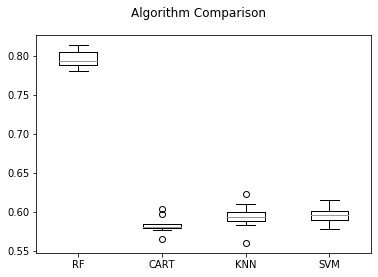

In [57]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier #scikit doc says doesn't support categorical variables
from sklearn.neighbors import KNeighborsClassifier #needs scaled data
from sklearn.svm import SVC #needs scaled data
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('RF', RandomForestClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### repeat with scaled data to compare results

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_sc = scaler.transform(x_train)
# apply same transformation to test data
x_test_sc = scaler.transform(x_test)

SVM: 0.494827 (0.019688)


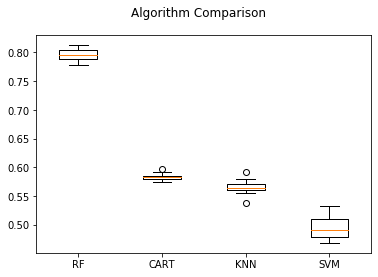

In [59]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('RF', RandomForestClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, x_train_sc, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Repeat with the Reduced df

### Build training & test data sets

In [60]:
df = pd.read_csv('reduced_BFS_trainingData.csv', header = 0)
df.head()

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,LOCATION
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1-2-106
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1-2-106
2,100,100,100,100,100,-97,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1-2-103
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1-2-102
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,0-0-122


In [61]:
# Select Features by dropping the dependent variable
features = df.drop('LOCATION', axis=1)
print('Summary of feature sample')
features.head()

Summary of feature sample


,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,WAP510,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
2,100,100,100,100,100,-97,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


In [62]:
# Select Dependent Variable
depVar = df['LOCATION']

In [63]:
# Establish the training set and test set -> 80% train, 20% test
x_train,x_test,y_train,y_test=train_test_split(features,depVar,test_size=0.2)
x_train.head()

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,WAP510,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519
11981,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,-85,100,100,100
15515,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
16583,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
6892,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
13826,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


In [64]:
x_train.shape

(13286, 465)

In [65]:
x_test.shape

(3322, 465)

RF: 0.797003 (0.009945)
CART: 0.584600 (0.009939)
KNN: 0.598828 (0.015269)
SVM: 0.604698 (0.009421)


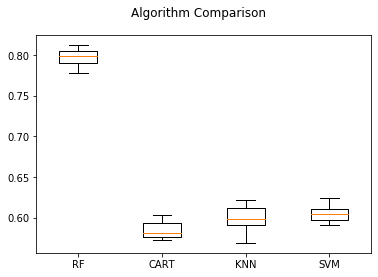

In [66]:
### Perform Initial Model Comparisons
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('RF', RandomForestClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Determine BuildingID

### Use full data set

In [73]:
df = pd.read_csv('full_B_trainingData.csv', header = 0)
df.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LOCATION
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1
2,100,100,100,100,100,100,100,-97,100,100,...,100,100,100,100,100,100,100,100,100,1
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,0


In [74]:
# Select Features by dropping the dependent variable
features = df.drop('LOCATION', axis=1)
print('Summary of feature sample')
features.head()

Summary of feature sample


,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
2,100,100,100,100,100,100,100,-97,100,100,...,100,100,100,100,100,100,100,100,100,100
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


In [75]:
# Select Dependent Variable
depVar = df['LOCATION']

In [76]:
# Establish the training set and test set -> 80% train, 20% test
x_train,x_test,y_train,y_test=train_test_split(features,depVar,test_size=0.2)
x_train.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
9986,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
3102,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
3740,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,-90,100,100,100
7499,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,-87,100,100,100
9334,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


In [77]:
x_train.shape

(15949, 520)

RF: 0.997617 (0.001279)
CART: 0.995925 (0.001198)
KNN: 0.997617 (0.001279)
SVM: 0.997931 (0.001431)


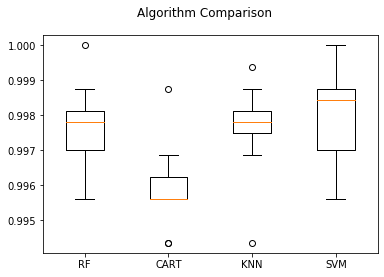

In [78]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('RF', RandomForestClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Determine BuildingID and FLOOR

### use full data set

In [79]:
df = pd.read_csv('full_BF_trainingData.csv', header = 0)
df.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LOCATION
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1-2
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1-2
2,100,100,100,100,100,100,100,-97,100,100,...,100,100,100,100,100,100,100,100,100,1-2
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1-2
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,0-0


In [80]:
# Select Features by dropping the dependent variable
features = df.drop('LOCATION', axis=1)
print('Summary of feature sample')
features.head()

Summary of feature sample


,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
2,100,100,100,100,100,100,100,-97,100,100,...,100,100,100,100,100,100,100,100,100,100
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


In [81]:
# Select Dependent Variable
depVar = df['LOCATION']

In [82]:
# Establish the training set and test set -> 80% train, 20% test
x_train,x_test,y_train,y_test=train_test_split(features,depVar,test_size=0.2)
x_train.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
14346,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
4601,100,100,100,100,100,100,100,100,100,100,...,-88,100,100,100,100,-56,100,100,100,100
2637,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,-86,100,100,100
9595,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
6784,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


In [83]:
x_train.shape

(15949, 520)

RF: 0.993605 (0.001746)
CART: 0.943069 (0.004256)
KNN: 0.965076 (0.003365)
SVM: 0.972099 (0.004514)


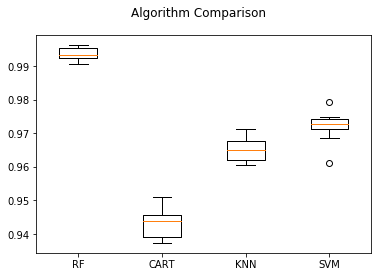

In [84]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('RF', RandomForestClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Determine Location when BuildingID=0 and FLOOR=0

In [138]:
df = pd.read_csv('full_B0-F0_trainingData.csv', header = 0)
df.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LOCATION
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,122-2
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,102-2
2,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,110-2
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,111-2
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,107-2


In [139]:
# Select Features by dropping the dependent variable
features = df.drop('LOCATION', axis=1)

In [140]:
# Select Dependent Variable
depVar = df['LOCATION']

In [141]:
# Establish the training set and test set -> 80% train, 20% test
x_train,x_test,y_train,y_test=train_test_split(features,depVar,test_size=0.2)

In [142]:
x_train.shape

(847, 520)

In [143]:
x_test.shape

(212, 520)

RF: 0.815826 (0.044393)
CART: 0.627997 (0.048950)
KNN: 0.553641 (0.053015)
SVM: 0.539482 (0.045306)


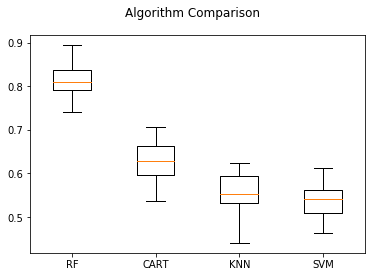

In [144]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('RF', RandomForestClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Determine Location when BuildingID=0 and FLOOR=1

In [146]:
df = pd.read_csv('full_B0-F1_trainingData.csv', header = 0)
df.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LOCATION
0,100,100,100,100,100,100,-83,100,100,100,...,100,100,100,100,100,100,100,100,100,211-2
1,100,100,100,100,100,100,-88,100,100,100,...,100,100,100,100,100,100,100,100,100,210-2
2,100,100,100,100,100,100,-92,100,100,100,...,100,100,100,100,100,100,100,100,100,209-2
3,100,100,100,100,100,100,-75,100,100,100,...,100,100,100,100,100,100,100,100,100,208-2
4,100,100,100,100,100,100,-71,100,100,100,...,100,100,100,100,100,100,100,100,100,205-2


In [147]:
# Select Features by dropping the dependent variable
features = df.drop('LOCATION', axis=1)
# Select Dependent Variable
depVar = df['LOCATION']
# Establish the training set and test set -> 80% train, 20% test
x_train,x_test,y_train,y_test=train_test_split(features,depVar,test_size=0.2)
x_train.shape

(1084, 520)

In [148]:
x_test.shape

(272, 520)

RF: 0.840392 (0.026868)
CART: 0.642117 (0.035689)
KNN: 0.560958 (0.040693)
SVM: 0.559106 (0.039857)


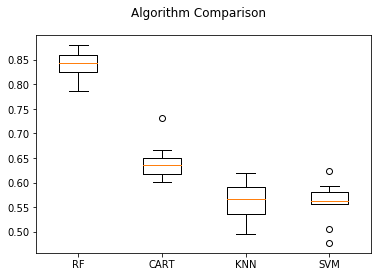

In [149]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('RF', RandomForestClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Determine Location when BuildingID=0 and FLOOR=2

In [150]:
df = pd.read_csv('full_B0-F2_trainingData.csv', header = 0)
df.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LOCATION
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,214-1
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,132-2
2,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,133-2
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,138-2
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,117-2


In [151]:
# Select Features by dropping the dependent variable
features = df.drop('LOCATION', axis=1)
# Select Dependent Variable
depVar = df['LOCATION']
# Establish the training set and test set -> 80% train, 20% test
x_train,x_test,y_train,y_test=train_test_split(features,depVar,test_size=0.2)
x_train.shape

(1154, 520)

In [152]:
x_test.shape

(289, 520)

RF: 0.702729 (0.029255)
CART: 0.548463 (0.040843)
KNN: 0.526822 (0.031761)
SVM: 0.530345 (0.031107)


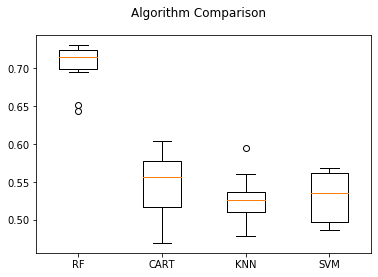

In [153]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('RF', RandomForestClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Determine Location when BuildingID=0 and FLOOR=3

In [154]:
df = pd.read_csv('full_B0-F3_trainingData.csv', header = 0)
df.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LOCATION
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,129-2
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,137-2
2,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,135-2
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,131-2
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,136-2


In [155]:
# Select Features by dropping the dependent variable
features = df.drop('LOCATION', axis=1)
# Select Dependent Variable
depVar = df['LOCATION']
# Establish the training set and test set -> 80% train, 20% test
x_train,x_test,y_train,y_test=train_test_split(features,depVar,test_size=0.2)
x_train.shape

(1112, 520)

In [156]:
x_test.shape

(279, 520)

RF: 0.701400 (0.035764)
CART: 0.559451 (0.053984)
KNN: 0.525225 (0.030852)
SVM: 0.523488 (0.042365)


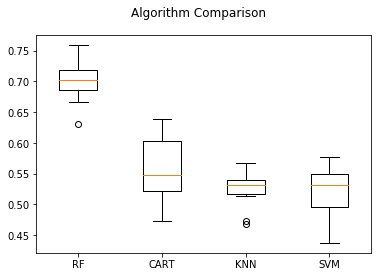

In [157]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('RF', RandomForestClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Determine Location when BuildingID=0

In [174]:
df = pd.read_csv('full_B0-FSR_trainingData.csv', header = 0)
df.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LOCATION
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,0-122-2
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,0-102-2
2,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,0-110-2
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,0-111-2
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,0-107-2


In [175]:
# Select Features by dropping the dependent variable
features = df.drop('LOCATION', axis=1)
# Select Dependent Variable
depVar = df['LOCATION']
# Establish the training set and test set -> 80% train, 20% test
x_train,x_test,y_train,y_test=train_test_split(features,depVar,test_size=0.2)
x_train.shape

(4199, 520)

In [176]:
x_test.shape

(1050, 520)

RF: 0.746843 (0.026374)
CART: 0.566801 (0.024550)
KNN: 0.532521 (0.030575)
SVM: 0.536551 (0.027425)


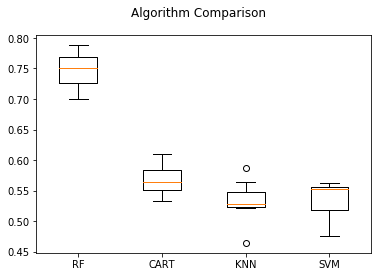

In [177]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('RF', RandomForestClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Determine Location when BuildingID=1

In [178]:
df = pd.read_csv('full_B1-FSR_trainingData.csv', header = 0)
df.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LOCATION
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,2-106-2
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,2-106-2
2,100,100,100,100,100,100,100,-97,100,100,...,100,100,100,100,100,100,100,100,100,2-103-2
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,2-102-2
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,2-105-2


In [179]:
# Select Features by dropping the dependent variable
features = df.drop('LOCATION', axis=1)
# Select Dependent Variable
depVar = df['LOCATION']
# Establish the training set and test set -> 80% train, 20% test
x_train,x_test,y_train,y_test=train_test_split(features,depVar,test_size=0.2)
x_train.shape

(4156, 520)

In [180]:
x_test.shape

(1040, 520)

RF: 0.849371 (0.017315)
CART: 0.681420 (0.017559)
KNN: 0.631613 (0.024950)
SVM: 0.602499 (0.020682)


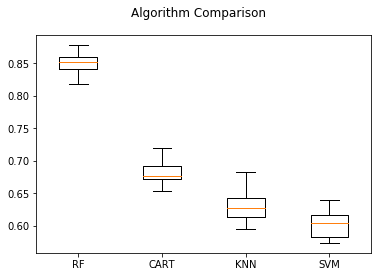

In [181]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('RF', RandomForestClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Determine Location when BuildingID=2

In [183]:
df = pd.read_csv('full_B2-FSR_trainingData.csv', header = 0)
df.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LOCATION
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,-93,100,100,100,3-247-2
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,-89,100,100,100,3-248-2
2,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,-91,100,100,3-247-1
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,-90,100,100,100,3-246-2
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,-92,100,100,100,3-245-2


In [184]:
# Select Features by dropping the dependent variable
features = df.drop('LOCATION', axis=1)
# Select Dependent Variable
depVar = df['LOCATION']
# Establish the training set and test set -> 80% train, 20% test
x_train,x_test,y_train,y_test=train_test_split(features,depVar,test_size=0.2)
x_train.shape

(7593, 520)

In [185]:
x_test.shape

(1899, 520)

RF: 0.800341 (0.016440)
CART: 0.557219 (0.015852)
KNN: 0.602131 (0.016327)
SVM: 0.628466 (0.025162)


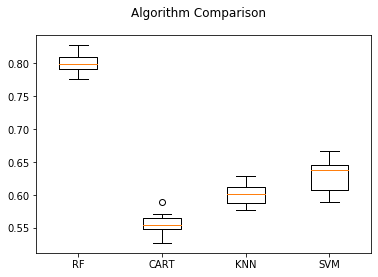

In [186]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('RF', RandomForestClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Tune RF model to try to improve BuildingID=0 results

In [24]:
df = pd.read_csv('full_B0-FSR_trainingData.csv', header = 0)
df.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LOCATION
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,0-122-2
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,0-102-2
2,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,0-110-2
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,0-111-2
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,0-107-2


In [25]:
# Select Features by dropping the dependent variable
features = df.drop('LOCATION', axis=1)
# Select Dependent Variable
depVar = df['LOCATION']
# Establish the training set and test set -> 80% train, 20% test
x_train,x_test,y_train,y_test=train_test_split(features,depVar,test_size=0.2)
x_train.shape

(4199, 520)

In [26]:
modelRF = RandomForestClassifier()
# Look at parameters used by our current random forest
from pprint import pprint
print('Parameters currently in use:\n')
pprint(modelRF.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


Use Random Search Cross Validation in Scikit-Learn
Tune these parameters:<br> n_estimators = number of trees in the foreset
<br>max_features = max number of features considered for splitting a node
<br>max_depth = max number of levels in each decision tree
<br>min_samples_split = min number of data points placed in a node before the node is split
<br>min_samples_leaf = min number of data points allowed in a leaf node
<br>bootstrap = method for sampling data points (with or without replacement)

In [27]:
from sklearn.model_selection import RandomizedSearchCV
#setup the random grid
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,
'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [28]:
# instantiate the random search and fit it like any Scikit-Learn model:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 20.4min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [29]:
#best parameters from fitting the random search
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': False}

Evaluate Random Search: compare the base model with the best random search model

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
def evaluate(model, x_test, y_test):
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test,predictions)
    print('Model Performance')
    print('Accuracy = {:0.3f}%.'.format(accuracy))
    return accuracy
base_model = RandomForestClassifier()
base_model.fit(x_train,y_train)
base_accuracy = evaluate(base_model, x_test, y_test)
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, x_test, y_test)
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Accuracy = 0.775%.
Model Performance
Accuracy = 0.785%.
Improvement of 1.23%.


In [31]:
predictionsRF = best_random.predict(x_test)

In [32]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, predictionsRF)

0.7837972778318867

In [33]:
accuracy_score(y_test,predictionsRF)

0.7847619047619048

In [34]:
conf_matrix = confusion_matrix(y_test, predictionsRF)
print(conf_matrix)

[[3 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 8 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 5 0]
 [0 0 0 ... 0 0 6]]


In [35]:
# Save confusion matrix to csv file
np.savetxt('B0_confusion_matrix.csv', conf_matrix, delimiter=',', fmt='%d')

## Tune RF model to try to improve BuildingID=1 results

In [36]:
df = pd.read_csv('full_B1-FSR_trainingData.csv', header = 0)
df.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LOCATION
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,2-106-2
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,2-106-2
2,100,100,100,100,100,100,100,-97,100,100,...,100,100,100,100,100,100,100,100,100,2-103-2
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,2-102-2
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,2-105-2


In [37]:
# Select Features by dropping the dependent variable
features = df.drop('LOCATION', axis=1)
# Select Dependent Variable
depVar = df['LOCATION']
# Establish the training set and test set -> 80% train, 20% test
x_train,x_test,y_train,y_test=train_test_split(features,depVar,test_size=0.2)
x_train.shape

(4156, 520)

In [38]:
from sklearn.model_selection import RandomizedSearchCV
#setup the random grid
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,
'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [39]:
# instantiate the random search and fit it like any Scikit-Learn model:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/clark/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 17.9min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [40]:
#best parameters from fitting the random search
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 40,
 'bootstrap': False}

Evaluate Random Search: compare the base model with the best random search model

In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
def evaluate(model, x_test, y_test):
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test,predictions)
    print('Model Performance')
    print('Accuracy = {:0.3f}%.'.format(accuracy))
    return accuracy
base_model = RandomForestClassifier()
base_model.fit(x_train,y_train)
base_accuracy = evaluate(base_model, x_test, y_test)
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, x_test, y_test)
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Accuracy = 0.851%.
Model Performance
Accuracy = 0.867%.
Improvement of 1.92%.


In [42]:
predictionsRF = best_random.predict(x_test)

In [43]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, predictionsRF)

0.8664639558750463

In [44]:
accuracy_score(y_test,predictionsRF)

0.8673076923076923

In [45]:
conf_matrix = confusion_matrix(y_test, predictionsRF)
print(conf_matrix)

[[2 1 0 ... 0 0 0]
 [0 5 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]


In [46]:
# Save confusion matrix to csv file
np.savetxt('B1_confusion_matrix.csv', conf_matrix, delimiter=',', fmt='%d')

## Tune RF model to try to improve BuildingID=2 results

In [4]:
df = pd.read_csv('full_B2-FSR_trainingData.csv', header = 0)
df.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LOCATION
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,-93,100,100,100,3-247-2
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,-89,100,100,100,3-248-2
2,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,-91,100,100,3-247-1
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,-90,100,100,100,3-246-2
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,-92,100,100,100,3-245-2


In [5]:
# Select Features by dropping the dependent variable
features = df.drop('LOCATION', axis=1)
# Select Dependent Variable
depVar = df['LOCATION']
# Establish the training set and test set -> 80% train, 20% test
x_train,x_test,y_train,y_test=train_test_split(features,depVar,test_size=0.2)
x_train.shape

(7593, 520)

NOTE: Same size of grid for Building 2 analysis as for Buildings 0 and 1 caused computer to lock or crash - even with njobs=6 with 8 core computer. So reducing grid based on common results of Buildings 0 and 1.

In [8]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
#setup the random grid
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 800, stop = 1600, num = 5)]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1]
# Method of selecting samples for training each tree
bootstrap = [False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,
'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [False],
 'max_depth': [10, 20, 30, 40, 50, None],
 'max_features': ['auto'],
 'min_samples_leaf': [1],
 'min_samples_split': [2],
 'n_estimators': [800, 1000, 1200, 1400, 1600]}


In [10]:
from sklearn.ensemble import RandomForestClassifier
# instantiate the random search and fit it like any Scikit-Learn model:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = 4)
# Fit the random search model
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


/Users/clark/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 30 is smaller than n_iter=100. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/Users/clark/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed: 10.4min
[Parallel(n_jobs=4)]: Done  90 out of  90 | elapsed: 38.9min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [11]:
#best parameters from fitting the random search
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': False}

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
def evaluate(model, x_test, y_test):
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test,predictions)
    print('Model Performance')
    print('Accuracy = {:0.3f}%.'.format(accuracy))
    return accuracy
base_model = RandomForestClassifier()
base_model.fit(x_train,y_train)
base_accuracy = evaluate(base_model, x_test, y_test)
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, x_test, y_test)
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Accuracy = 0.807%.
Model Performance
Accuracy = 0.827%.
Improvement of 2.41%.


In [19]:
predictionsRF = best_random.predict(x_test)

In [20]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, predictionsRF)

0.8261626745479547

In [21]:
accuracy_score(y_test,predictionsRF)

0.8267509215376514

In [22]:
conf_matrix = confusion_matrix(y_test, predictionsRF)
print(conf_matrix)

[[ 4  0  1 ...  0  0  0]
 [ 0 11  0 ...  0  0  0]
 [ 0  1  2 ...  0  0  0]
 ...
 [ 0  0  0 ...  3  0  0]
 [ 0  0  0 ...  0  1  0]
 [ 0  0  0 ...  0  1  0]]


In [23]:
# Save confusion matrix to csv file
np.savetxt('B2_confusion_matrix.csv', conf_matrix, delimiter=',', fmt='%d')